# üìä Analyse av personskader per kommune og kj√∏nn
Denne rapporten analyserer fordelingen av personskader per kommune, m√•ned og kj√∏nn i 2024. Dataene er fordelt etter:
- Kommune
- M√•ned
- Kj√∏nn (Mann, Kvinne, Ukjent)

Minst 7 analyser presenteres, med grafer, tolkning og konklusjon.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('skader_kommune_kj√∏nn_ny.csv', sep=';', skiprows=13, encoding='utf-8')
df.columns = ['√Ör', 'Kommune', 'M√•ned', 'Mann', 'Kvinne', 'Ukjent', 'Sum']
for col in ['Mann', 'Kvinne', 'Ukjent', 'Sum']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_14076\637301191.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('skader_kommune_kj√∏nn_ny.csv', sep=';', skiprows=13, encoding='utf-8')


√Ör     Kommune      M√•ned  Mann  Kvinne  Ukjent  Sum
0  2024  301 - Oslo       Juli   0.0     0.0     0.0  0.0
1  2024  301 - Oslo     August   0.0     0.0     0.0  0.0
2  2024  301 - Oslo  September   0.0     0.0     0.0  0.0
3  2024  301 - Oslo    Oktober   0.0     0.0     0.0  0.0
4  2024  301 - Oslo   November   0.0     0.0     0.0  0.0

## Analyse 1: Total skader per kj√∏nn

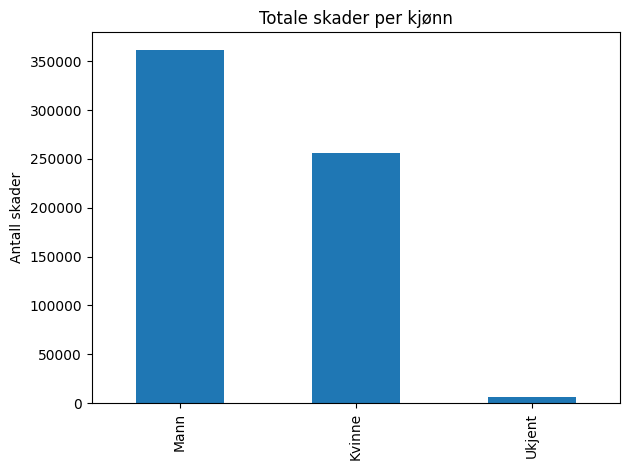

In [2]:
df[['Mann', 'Kvinne', 'Ukjent']].sum().plot(kind='bar', title='Totale skader per kj√∏nn', ylabel='Antall skader')
plt.tight_layout()
plt.show()

## üîç Analyse 1: Totale skader per kj√∏nn

**Observasjon:**
- Flest skader er registrert for menn (~360 000), deretter kvinner (~260 000), mens "ukjent kj√∏nn" er sv√¶rt lavt.

**Tolkning:**
- Skader er mer vanlig blant menn, noe som kan skyldes h√∏yere risikoeksponering i arbeid eller fritid.
- Andelen med ukjent kj√∏nn er lav, noe som tyder p√• god datakvalitet.

## Analyse 2: Totalt antall skader per m√•ned

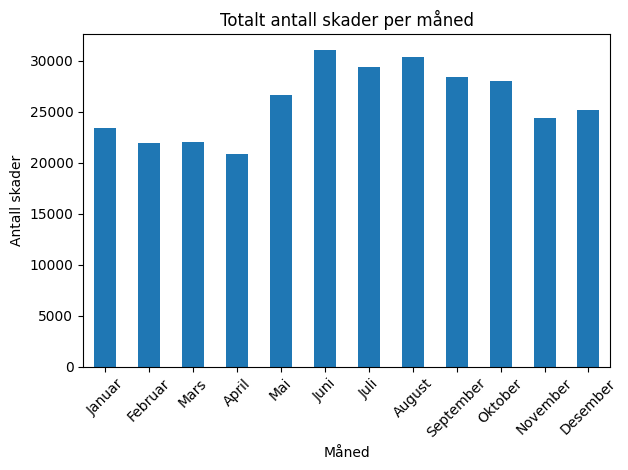

In [3]:
m√•ned_rekkef√∏lge = ['Januar','Februar','Mars','April','Mai','Juni','Juli','August','September','Oktober','November','Desember']
df.groupby('M√•ned')['Sum'].sum().reindex(m√•ned_rekkef√∏lge).plot(kind='bar')
plt.title('Totalt antall skader per m√•ned')
plt.ylabel('Antall skader')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## üîç Analyse 2: Totalt antall skader per m√•ned

**Observasjon:**
- Skadetallene er lavest i vinterm√•nedene (spesielt april).
- H√∏yest antall skader i sommerm√•nedene juni, juli og august.

**Tolkning:**
- √òkt aktivitet, reise og trafikk i sommerm√•nedene bidrar sannsynligvis til flere skader.
- Lavere aktivitet eller underrapportering i vinter kan forklare de lavere tallene.

## Analyse 3: Kommuner med flest skader

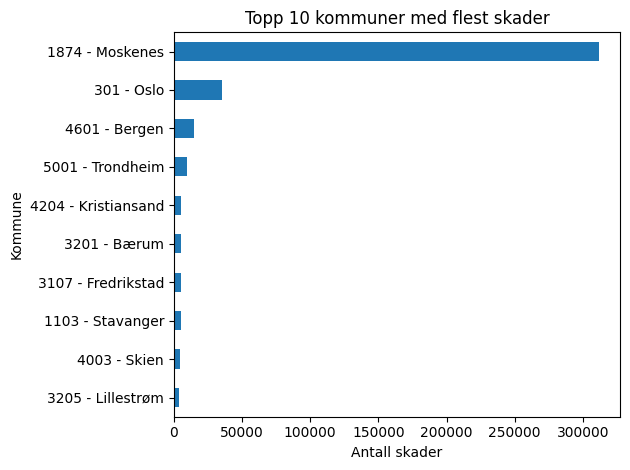

In [4]:
df.groupby('Kommune')['Sum'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Topp 10 kommuner med flest skader')
plt.xlabel('Antall skader')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## üîç Analyse 3: Topp 10 kommuner med flest skader

**Observasjon:**
- Moskenes har uvanlig h√∏yt skadeantall og topper listen.
- Oslo, Bergen og Trondheim har ogs√• mange skader, men langt under Moskenes.

**Tolkning:**
- Moskenes sitt ekstremt h√∏ye tall indikerer mulige feil eller avvik i datakilden.
- Oslo og andre storbyer har h√∏ye tall som forventet, gitt innbyggertall og trafikkmengde.

## Analyse 4: Kj√∏nnsforskjell i Oslo

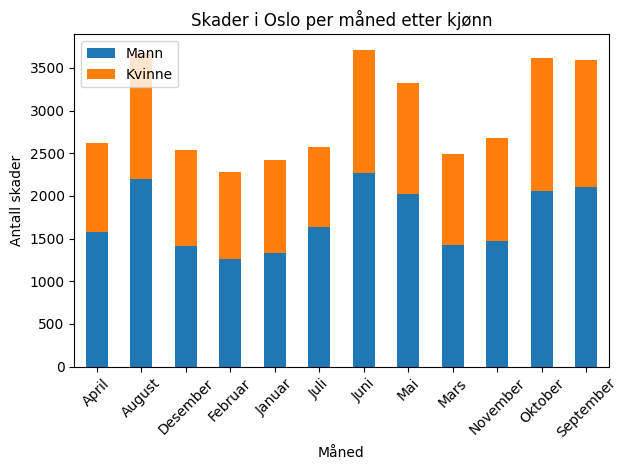

In [5]:
df_oslo = df[df['Kommune'].str.contains('Oslo')]
df_oslo.groupby('M√•ned')[['Mann', 'Kvinne']].sum().plot(kind='bar', stacked=True)
plt.title('Skader i Oslo per m√•ned etter kj√∏nn')
plt.ylabel('Antall skader')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## üîç Analyse 4: Skader i Oslo per m√•ned etter kj√∏nn

**Observasjon:**
- Skadevolum varierer mellom kj√∏nn gjennom √•ret.
- Kvinner dominerer i august og november, menn i juni og januar.

**Tolkning:**
- Ulike sesongm√∏nstre kan knyttes til forskjeller i arbeidsoppgaver, fritidsaktiviteter eller eksponering.
- M√∏nstret kan brukes til kj√∏nnsrettede forebyggingstiltak.

## Analyse 5: Ukjent kj√∏nn over m√•neder

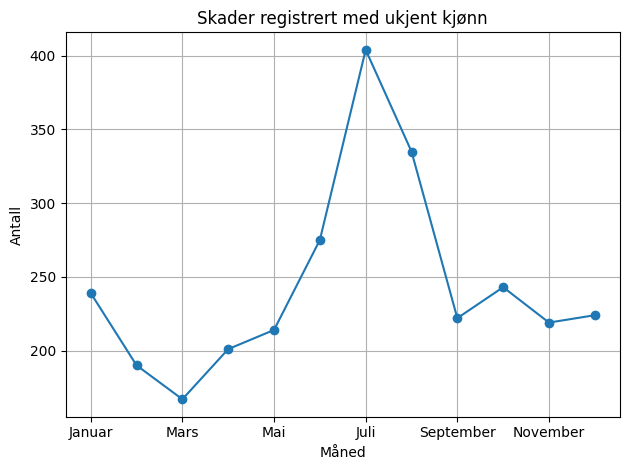

In [6]:
df.groupby('M√•ned')['Ukjent'].sum().reindex(m√•ned_rekkef√∏lge).plot(marker='o')
plt.title('Skader registrert med ukjent kj√∏nn')
plt.ylabel('Antall')
plt.grid(True)
plt.tight_layout()
plt.show()

## üîç Analyse 5: Skader registrert med ukjent kj√∏nn

**Observasjon:**
- Ukjent kj√∏nn topper i juli (~400), men holder seg lavt ellers.

**Tolkning:**
- H√∏ydepunktet i juli kan indikere registreringsproblemer under ferieperioder.
- Krever oppf√∏lging av datakvalitet og oppl√¶ring i innrapportering.

## Analyse 6: Variasjon i skadefordeling per kj√∏nn per kommune

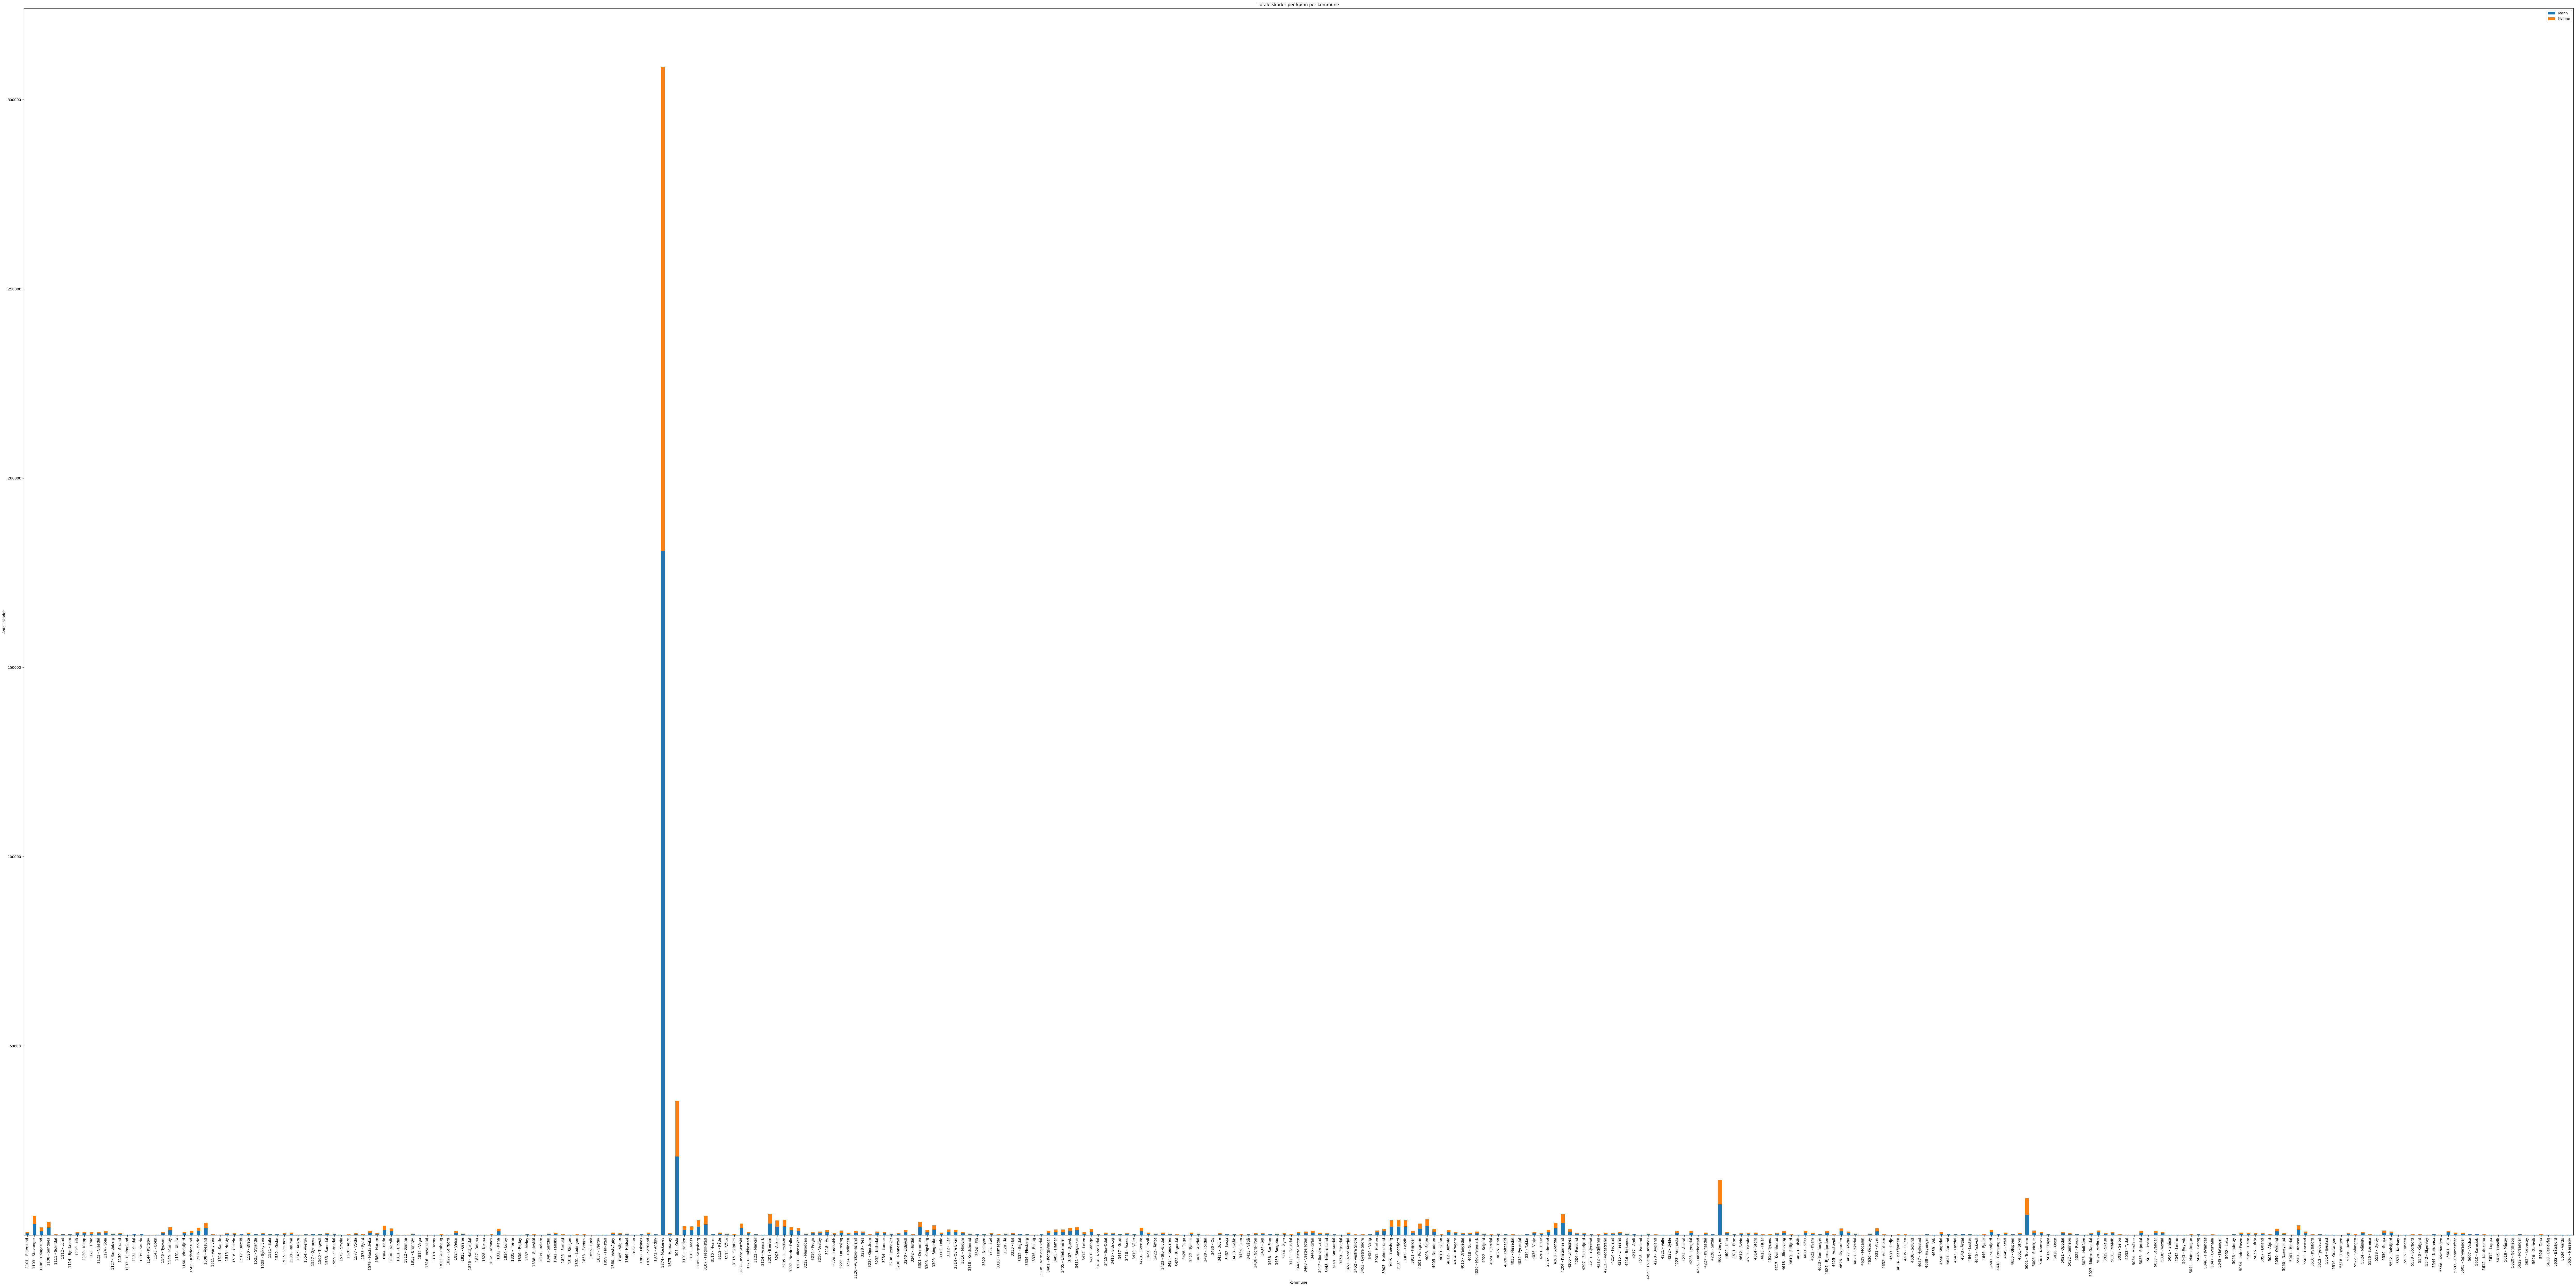

In [12]:
df.groupby('Kommune')[['Mann', 'Kvinne']].sum().plot(kind='bar', stacked=True, figsize=(100,50))
plt.title('Totale skader per kj√∏nn per kommune')
plt.ylabel('Antall skader')
plt.tight_layout()
plt.show()

**Tolkning:**
- Det er betydelige variasjoner mellom kommuner.
- St√∏rre kommuner har som forventet flere rapporterte skader.

## Analyse 7: Kj√∏nnsfordeling i alle m√•neder

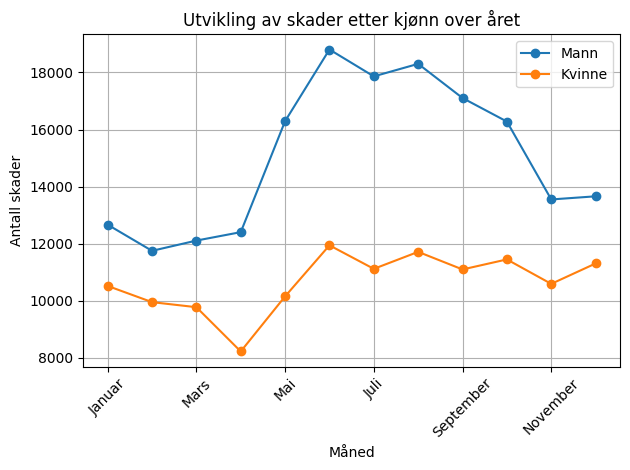

In [13]:
df.groupby('M√•ned')[['Mann', 'Kvinne']].sum().reindex(m√•ned_rekkef√∏lge).plot(kind='line', marker='o')
plt.title('Utvikling av skader etter kj√∏nn over √•ret')
plt.ylabel('Antall skader')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## üîç Analyse 6: Utvikling av skader etter kj√∏nn over √•ret

**Observasjon:**
- Menns skadetall stiger markant i sommerm√•nedene.
- Kvinners skadetall holder seg mer stabilt.

**Tolkning:**
- Menn har tydeligere sesongvariasjon, trolig pga. mer risikofylt atferd i sommer.
- Kvinner har jevnere eksponering og skadeprofil gjennom √•ret.


## ‚úÖ Konklusjon

- **Store kommuner** som Oslo har h√∏yest skadevolum, men enkelte kommuner som **Moskenes** har unormale verdier og b√∏r gjennomg√•s.
- **Menn har flest skader**, men forskjellen til kvinner varierer over √•ret.
- **Sommeren har flest skader**, trolig grunnet √∏kt aktivitet og trafikk.
- **Datakvalitet** er stort sett god, men juli viser svakheter i registrering (ukjent kj√∏nn).
- Analysen gir verdifull innsikt for **risikovurdering og m√•lrettet forebygging** b√•de etter kj√∏nn og geografi.